In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
dataset=pd.read_csv(".\Dataset\Ecommerce Customers.csv")

In [3]:
dataset.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
dataset.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


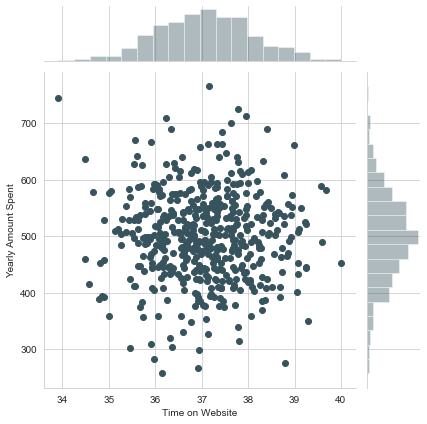

In [6]:

sb.set_palette("GnBu_d")
sb.set_style('whitegrid')
sb.jointplot(data=dataset,x='Time on Website',y='Yearly Amount Spent')

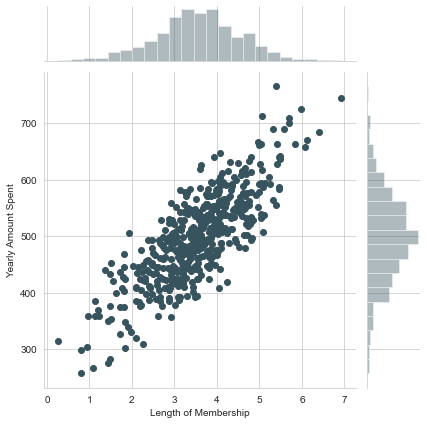

In [7]:

sb.set_palette("GnBu_d")
sb.set_style('whitegrid')
sb.jointplot(data=dataset,x='Length of Membership',y='Yearly Amount Spent')


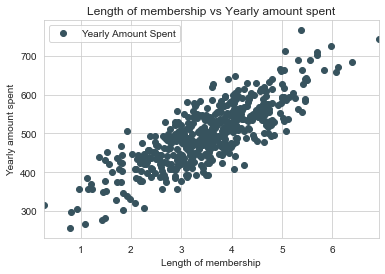

In [8]:
dataset.plot(x="Length of Membership", y="Yearly Amount Spent", style="o")
plt.title("Length of membership vs Yearly amount spent")
plt.xlabel("Length of membership")
plt.ylabel("Yearly amount spent")
plt.show()

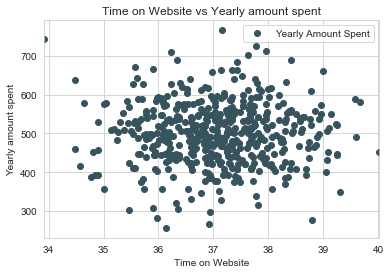

In [9]:
dataset.plot(x="Time on Website", y="Yearly Amount Spent", style="o")
plt.title("Time on Website vs Yearly amount spent")
plt.xlabel("Time on Website")
plt.ylabel("Yearly amount spent")
plt.show()


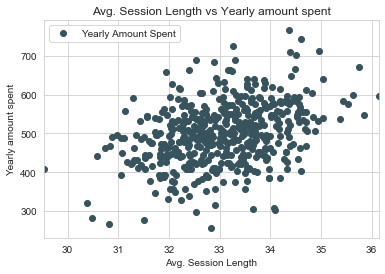

In [10]:
dataset.plot(x="Avg. Session Length", y="Yearly Amount Spent", style="o")
plt.title("Avg. Session Length vs Yearly amount spent")
plt.xlabel("Avg. Session Length")
plt.ylabel("Yearly amount spent")
plt.show()


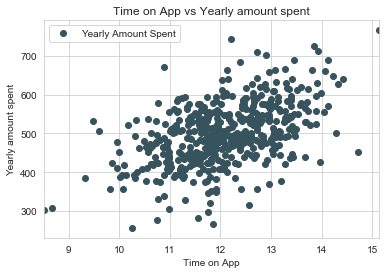

In [11]:
dataset.plot(x="Time on App", y="Yearly Amount Spent", style="o")
plt.title("Time on App vs Yearly amount spent")
plt.xlabel("Time on App")
plt.ylabel("Yearly amount spent")
plt.show()


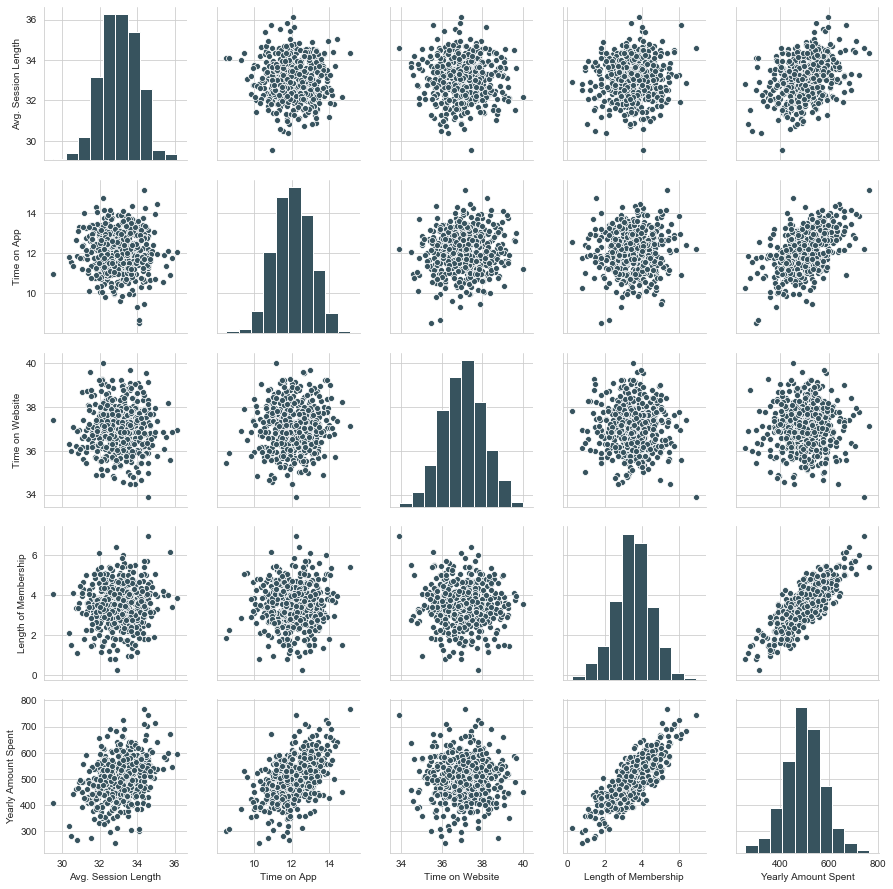

In [12]:
sb.pairplot(dataset)

In [13]:
y = dataset['Yearly Amount Spent']
X = dataset[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [16]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
# The coefficients
print('Coefficients: \n', lm.coef_)
print('Intercept: ',lm.intercept_)
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]
Intercept:  -1047.9327822502385


,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [18]:
# predictions = lm.predict( X_test)

In [19]:
predictions = lm.predict( X_test)
df=pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(df)
#print(y_test)

         Actual   Predicted
18   452.315675  456.441861
361  401.033135  402.720053
104  410.069611  409.253154
4    599.406092  591.431034
156  586.155870  590.014373
..          ...         ...
147  479.731938  478.300766
346  488.387526  484.410296
423  461.112248  457.590999
17   407.704548  411.526576
259  375.398455  375.479006

[150 rows x 2 columns]


In [20]:
lm2=LinearRegression()

In [21]:
y2 = dataset['Yearly Amount Spent'].values.reshape(-1,1)
X2 = dataset['Length of Membership'].values.reshape(-1,1)

In [22]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=101)

In [23]:
lm2.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# The coefficients
print('Coefficients: \n', lm2.coef_)
print('Intercept: ',lm2.intercept_)

Coefficients: 
 [[62.95048627]]
Intercept:  [275.2686347]


In [25]:
predictions2 = lm2.predict( X_test2)

In [26]:
df2=pd.DataFrame({'Actual': y_test2.flatten(), 'Predicted': predictions2.flatten()})
print(df2)
#print(y_test)

        Actual   Predicted
0   452.315675  370.737805
1   401.033135  491.475839
2   410.069611  491.117033
3   599.406092  555.165905
4   586.155870  595.363127
..         ...         ...
95  555.068394  527.279893
96  506.375867  492.558020
97  451.575685  498.909665
98  458.376911  424.325832
99  536.130897  517.240793

[100 rows x 2 columns]


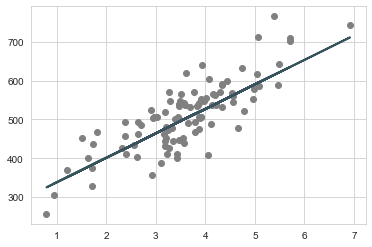

In [27]:
plt.scatter(X_test2,y_test2,color="gray")
plt.plot(X_test2,predictions2,linewidth=2)

Text(0, 0.5, 'Predicted Y')

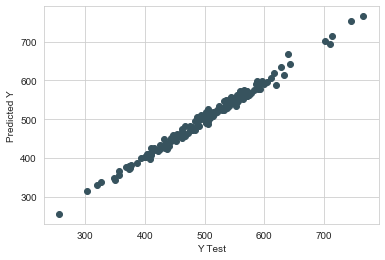

In [35]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

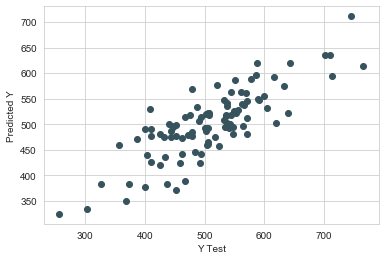

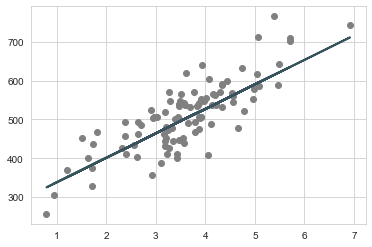

In [42]:
plt.scatter(y_test2,predictions2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()
plt.scatter(X_test2,y_test2,color="gray")
plt.plot(X_test2,predictions2,linewidth=2)

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430838
MSE: 79.81305165097461
RMSE: 8.933815066978642


In [44]:
print('MAE:', metrics.mean_absolute_error(y_test2, predictions2))
print('MSE:', metrics.mean_squared_error(y_test2, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, predictions2)))

MAE: 41.894731690781306
MSE: 2690.6076007869874
RMSE: 51.87106708741384


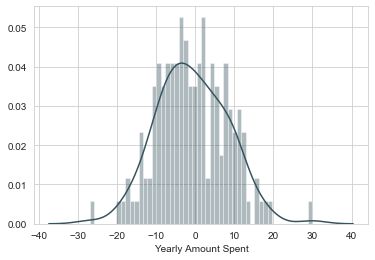

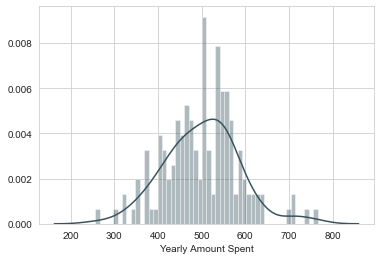

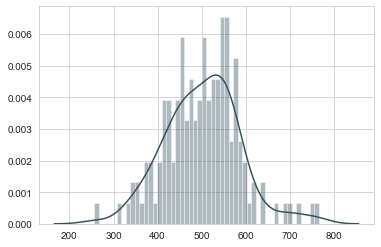

In [53]:
sb.distplot((y_test-predictions),bins=50);
plt.show()
sb.distplot((y_test),bins=50);
plt.show()
sb.distplot((predictions),bins=50);